In [1]:
import numpy as np
import matplotlib.pyplot as plt

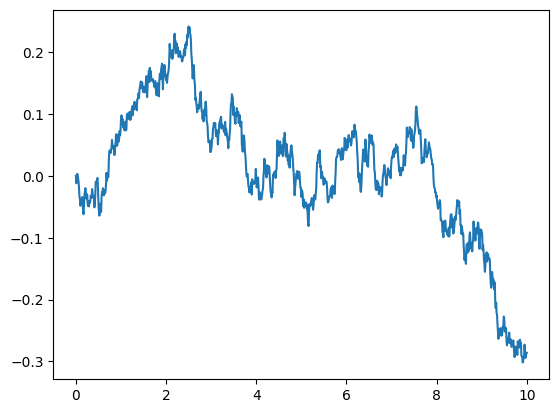

In [2]:
def wiener_process(n_steps, dt=0.01, t0=0, x0=0):
  ts = np.arange(t0, t0 + dt * (n_steps + 1), dt)
  xs = np.zeros(n_steps + 1)

  for i in range(n_steps):
    dx = np.random.randn() * dt
    xs[i + 1] = xs[i] + dx

  return ts, xs

n_steps = 1000  # we have two points when n_steps = 1
ts, xs = wiener_process(n_steps)
plt.plot(ts, xs)
plt.show()

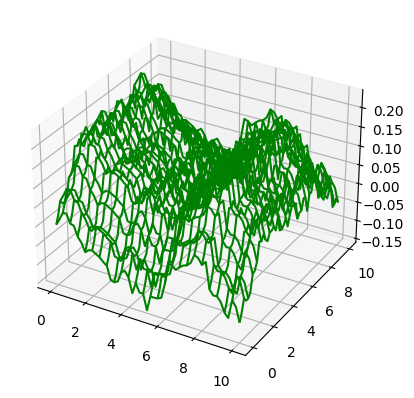

In [18]:
def wiener_wave(n_steps, x_min=0, x_max=1, x_start=0, y_start=0):
  dx = (x_max - x_min) / n_steps
  ts_, w1 = wiener_process(n_steps, dx)
  ts_, w2 = wiener_process(n_steps, dx)

  return np.tile(w1, (n_steps + 1, 1)) + np.tile(w2, (n_steps + 1, 1)).T

n_steps = 50
x_min = 0
x_max = 10
x = y = np.linspace(x_min, x_max, n_steps + 1)
X, Y = np.meshgrid(x, y)
Z = wiener_wave(n_steps)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_wireframe(X, Y, Z, color='green')
plt.show()